# Evidencia Final - Body Performance

In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.7 MB/s            
     |████████████████████████████████| 233 kB 58.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.2 MB 4.7 MB/s            
     |████████████████████████████████| 306 kB 53.9 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=5b34e49298479626738858b9f9c9789eab3e3b2de70abdd91a18cc10826c47df
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

In [5]:
%ls bodyPerformance.csv

bodyPerformance.csv


In [6]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [7]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [8]:
df.shape

(13393, 12)

In [9]:
df['age'].min()

21

In [10]:
df['age'].max()

64

# Introduccion
Esta es una base datos que muestra el nivel de desempeño, en algunos ejercicios, de 13,393 personas con un rango de 21 a 64 años de edad.
## Descripción de variables
* 'age' : variable númerica con un rango de edad de 21 a 64.
* 'gender' : variable categórica, tien dos categorías: F (mujer) y M (hombre). Nos dice el género de la persona.
* 'height_cm' : variable númerica que nos dice la altura en centímetros de la persona.
* 'weight_kg': variable númerica que nos dice el peso en kilogramos de la persona.
* 'body fat_%' : variable númerica que nos dice el % de grasa corporal de la persona.
* 'diastolic' : variable númerica que se refiere a la presión sanguínea, por minuto, en la arteria cuando el corazón se relaja entre latidos
* 'systolic' : variable númerica que se refiere a la presión sanguínea, por minuto, en la arteria cuando se contrae el corazón.
* 'gripForce' : variable númeica que nos muestra la fuerza de agarre de la persona.
* 'sit and bend forward_cm' : variable númerica que nos muestra cuantos centimetros se estira la persona al estar sentada.
* 'sit-ups counts' : variable númerica que nos muestra la cantidad de repeticiones en el ejercicio de abdominales que logro cada persona.
* 'broad jump_cm' : variable númerica que nos muestra la distancia en cm de la longitud de salto que logro cada persona.
* 'class' : variable categórica, tiene 4 categorías: A,B,C,D. A es que dio muy buenos resultados y D que dio malos resultados

Text(0.5, 1.0, '# de Hombres y Mujeres')

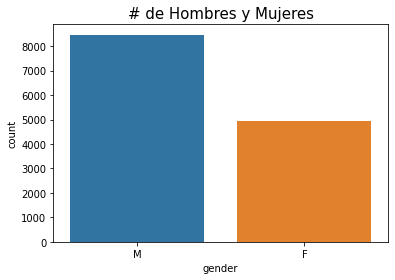

In [11]:
sns.countplot(x = 'gender', data = df)
plt.title('# de Hombres y Mujeres', fontsize = 15)

# Parte 1

## Pregunta de investigación 1:
### ¿Existe alguna correlación entre las variavles 'age' y 'gripForce'?
* Hipotesis: entre más jovén, mayor gripForce

In [12]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

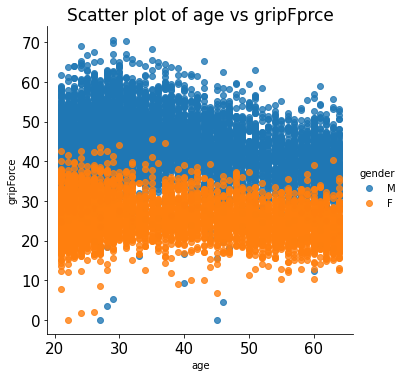

In [13]:
sns.lmplot (x = 'age', 
             y = 'gripForce',
             data = df,
            fit_reg = False,
            hue = 'gender'
            )
plt.title('Scatter plot of age vs gripFprce', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Conclusión: 
#### Se observa una correlación negativa debíl entre age y gripForce, es decir, que a mayor edad, menor gripForce. También se observa que, sin importar la edad, los hombres muestran un mayor gripForce en comparación a las mujeres

In [14]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

## Pregunta de investigación 2:
### ¿Qué género obtiene los mejores resultados en cuanto a 'gripForce', 'sit and bend forward_cm' y 'sit-ups counts'?
* Hipotesis: los hombres obtendran resultados superiores en 'gripForce' y 'sit-ups counts', mientras que las mujeres los superaran en 'sit and bend forward_cm'

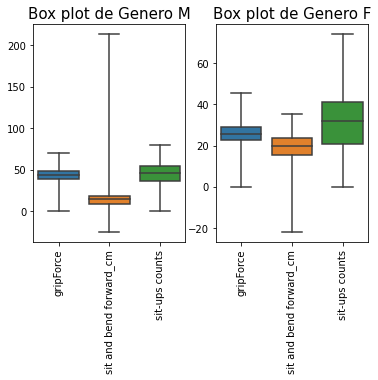

In [15]:
plt.subplot(1,2,1)

sns.boxplot(data = df.loc[df['gender'] == 'M', 
                          ['gripForce', 'sit and bend forward_cm', 'sit-ups counts']],
             whis = (0, 100)
           )

plt.title('Box plot de Genero M', fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)

plt.show

plt.subplot(1,2,2)

sns.boxplot(data = df.loc[df['gender'] == 'F', 
                          ['gripForce', 'sit and bend forward_cm', 'sit-ups counts']],
             whis = (0, 100)
           )

plt.title('Box plot de Genero F', fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)

plt.show()

### Conclusión: 
#### Los hombre obtienen un mejor promedio en cuanto al 'gripForce' y 'sit-ups counts', mientras que las mujeres los superan en 'sit and bend forward'

In [16]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

## Pregunta de investigación 3:
### ¿Cuál es el impacto de 'height_cm' en 'broad jump_cm'?
* Hipotesis: entre más altas sean las personas, más grande sera su broad jump

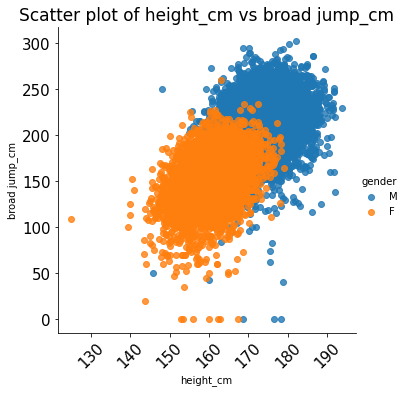

In [17]:
sns.lmplot (x = 'height_cm', 
             y = 'broad jump_cm',
             data = df,
            fit_reg = False,
            hue = 'gender'
            )
plt.title('Scatter plot of height_cm vs broad jump_cm', fontsize = 17)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

### Conclusión: 
#### Se observa una correlación positiva debíl entre ambas variables, se puede decir que entre más alto, mayor la longitud de salto

## Pregunta de investigación 4:
### ¿Cuáles son los resultados de 'class' de mayor recuencia? 

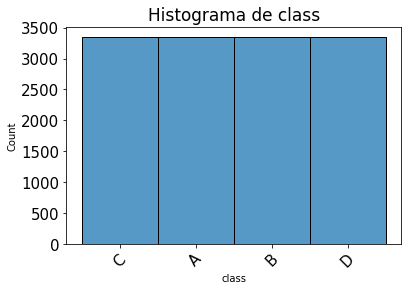

In [18]:
sns.histplot(df['class'],
             kde = False,
             bins = 20)

plt.title('Histograma de class', fontsize = 17)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

### Conclusión: 
#### Se obtuvieron frecuencia similar en los resultados de class 

## Pregunta de investigación 5:
### ¿El 'body fat_%' impacta en 'broad jump_cm' en cuanto a los gender?
* Hipotesis: entre más 'body fat_%', menor sera el broad jump 

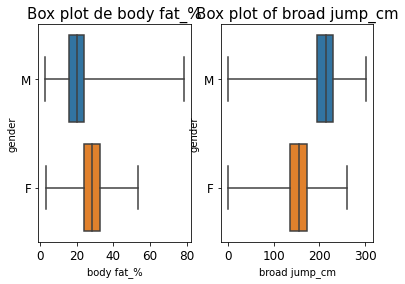

In [19]:
plt.subplot(1,2,1)

sns.boxplot(x = df['body fat_%'],
           whis = (0, 100),
           y = df['gender']
           )

plt.title('Box plot de body fat_%', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.show

plt.subplot(1,2,2)

sns.boxplot(x = df['broad jump_cm'],
           whis = (0, 100),
           y = df['gender']
           )

plt.title('Box plot of broad jump_cm', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.show()

### Conclusión: 
#### Se puede observar que el 'body fat_%' si tiene un impacto en el 'broad jump_cm', los hombres al tener menos % de grasa corporal, logran saltar más lejos

## Pregunta de investigación 6:
### ¿Que tanta diferencia hay entre las variables 'class' y gripForce?

In [20]:
grip = pd.pivot_table(df,
                             index = ['class'],
                          columns = ['gender'],
                          values = ['gripForce'],
                          aggfunc = {'gripForce':['median']}
                             )
grip          

gripForce      
          median      
gender         F     M
class                 
A           27.9  46.8
B           26.0  44.0
C           24.5  42.1
D           23.1  40.6

(array([20., 25., 30., 35., 40., 45., 50.]),
 <a list of 7 Text major ticklabel objects>)

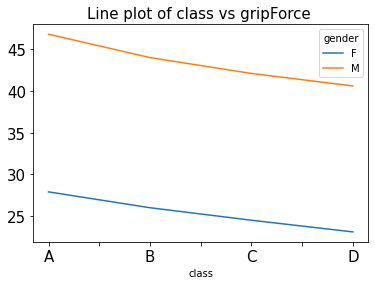

In [21]:
line_plot = grip[('gripForce','median')].plot(kind='line')

plt.title('Line plot of class vs gripForce ', fontsize = 15)
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 15)

# Parte 2

In [22]:
%ls bodyPerformancee.csv

bodyPerformancee.csv


In [23]:
df = pd.read_csv('bodyPerformancee.csv')
df

,age,gender,height,weight,bodyfat,diastolic,systolic,grip,sitandbend,abs,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13389,21,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13390,39,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13391,64,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
pd.set_option('display.max_columns', None)
df.head()

,age,gender,height,weight,bodyfat,diastolic,systolic,grip,sitandbend,abs,jump,class,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pregunta de investigación 7:
### ¿Cuál es el impacto de age en abs?
#### gripForce = b0+ b1*Age

In [24]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'bodyfat', 'diastolic', 'systolic',
       'grip', 'sitandbend', 'abs', 'jump', 'class', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [52]:
modelA = sm.OLS.from_formula('abs~age', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abs   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     5646.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:43:18   Log-Likelihood:                -52255.
No. Observations:               13393   AIC:                         1.045e+05
Df Residuals:                   13391   BIC:                         1.045e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.7552      0.298    203.996      0.000      60.171      61.339
age           -0.5706      0.008    -75.138      0.000      -0.585      -0.556
==============================================================================
Omnibus:                      445.965   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.327
Skew:                          -0.454   Prob(JB):                    1.24e-107
Kurtosis:                       3.239   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observaciones:
* Variable dependiente: Age
* Variable Independiente: abs
* R-squared: 0.297; por lo tanto, este modelo no es tan efficiente. Porque explica solo 29% de abs basado en age.
* Df Model: 1
* abs = 60.7552 - 0.5706 *Age

In [56]:
print('Numero de abdominales de una persona con edad de 31: \t', 60.7552 - 0.5706*31)
df.iloc[1:4, :]

Numero de abdominales de una persona con edad de 31: 	 43.0666


,age,gender,height,weight,bodyfat,diastolic,systolic,grip,sitandbend,abs,jump,class,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
1,25,M,165.0,55.8,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31,M,179.6,78.0,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,M,174.5,71.1,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pregunta de investigación 8:
### ¿Cuál es el impacto de age y gender en abs?
#### abs = b0+ b1*Age +b2*gender

In [57]:
modelB = sm.OLS.from_formula('abs~age + gender', data = df)
resultB = modelB.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abs   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     6496.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:47:38   Log-Likelihood:                -50069.
No. Observations:               13393   AIC:                         1.001e+05
Df Residuals:                   13390   BIC:                         1.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      51.4271      0.284    180.876      0.000      50.870      51.984
gender[T.M]    13.1274      0.183     71.890      0.000      12.769      13.485
age            -0.5426      0.006    -83.964      0.000      -0.555      -0.530
==============================================================================
Omnibus:                      503.150   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.834
Skew:                          -0.390   Prob(JB):                    2.64e-150
Kurtosis:                       3.791   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observaciones:
* Variable dependiente: Age
* Variable Independiente: abs
* R-squared: 0.492; por lo tanto, este modelo es medio efficiente. Porque explica el 49% de abs basado en age y gender.
* Df Model: 1
* abs = 51.4271 + 13.1274*gender - 0.5426*Age

## Caso 1:
* Age : 31
* Gender = M

In [64]:
print('Numero de abdominales de una persona con edad de 31 y genero M: \t', 51.4271 + 13.1274*1 - 0.5426*31)
df.iloc[1:4, :]

Numero de abdominales de una persona con edad de 31 y genero M: 	 47.733900000000006


,age,gender,height,weight,bodyfat,diastolic,systolic,grip,sitandbend,abs,jump,class,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
1,25,M,165.0,55.8,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31,M,179.6,78.0,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,M,174.5,71.1,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Caso 2:
* Age : 31
* Gender = F

In [66]:
print('Numero de abdominales de una persona con edad de 31 y genero F: \t', 51.4271 + 13.1274*0 - 0.5426*31)
df.iloc[145:148, :]

Numero de abdominales de una persona con edad de 31 y genero F: 	 34.606500000000004


,age,gender,height,weight,bodyfat,diastolic,systolic,grip,sitandbend,abs,jump,class,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
145,25,M,184.1,74.7,12.6,94.0,141.0,49.5,13.0,49.0,243.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,31,F,166.9,64.1,30.5,77.0,133.0,27.5,21.5,37.0,150.0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,21,M,175.0,66.4,16.5,77.0,124.0,39.4,13.0,54.0,248.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
